In [1]:
import pandas as pd

try:
    df = pd.read_csv('Location4.csv')
    display(df.head())
    #Optional:
    #display(df.tail())
    #print(df.shape)
except FileNotFoundError:
    print("Error: 'Location4.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None #Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922


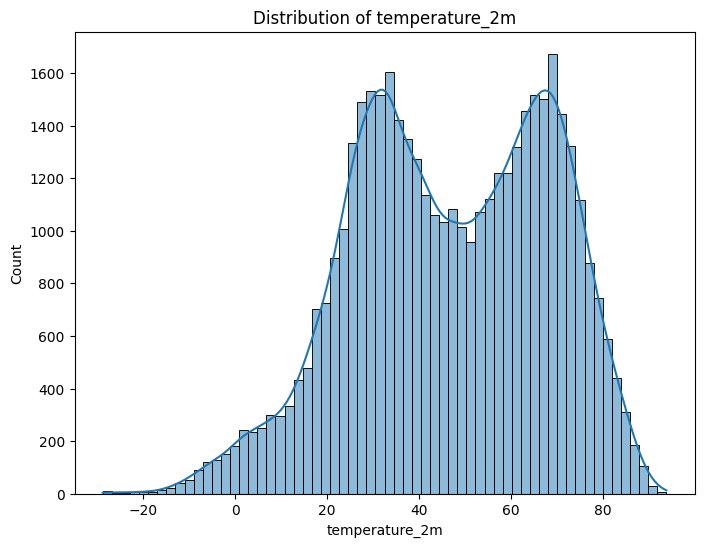

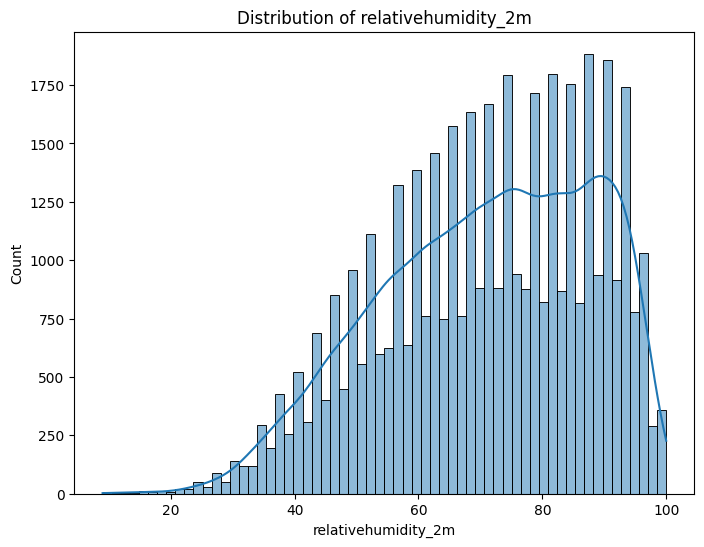

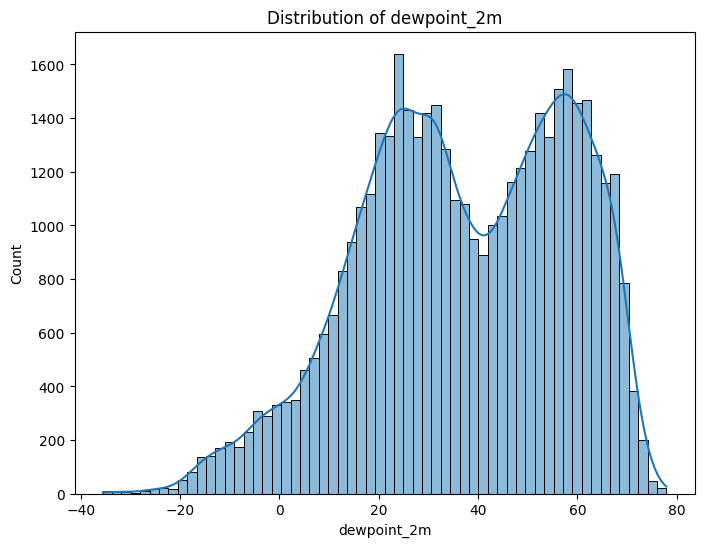

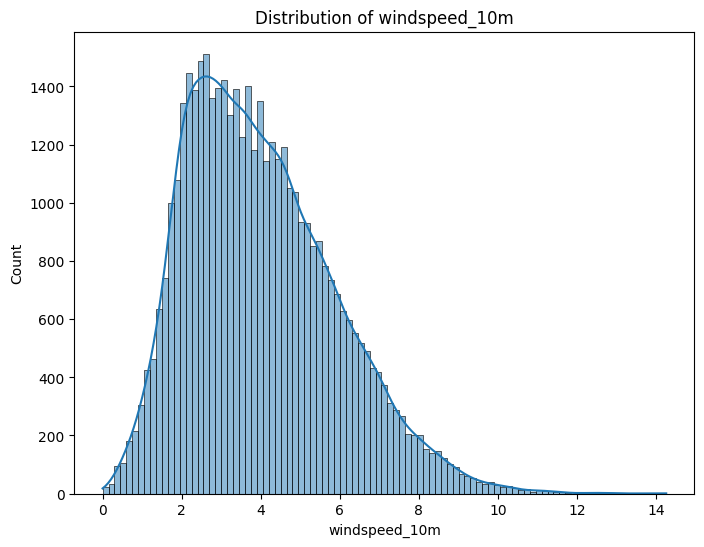

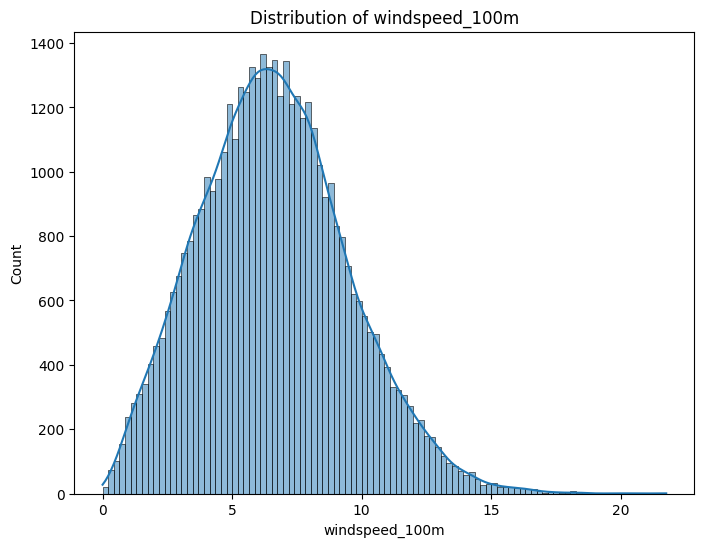

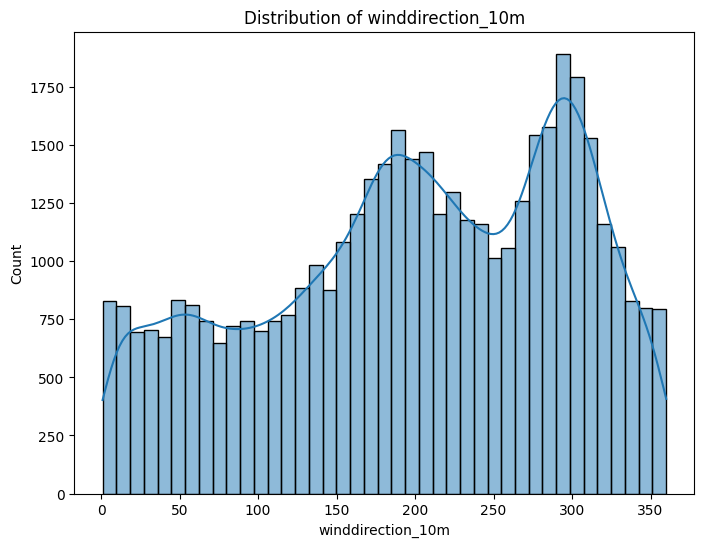

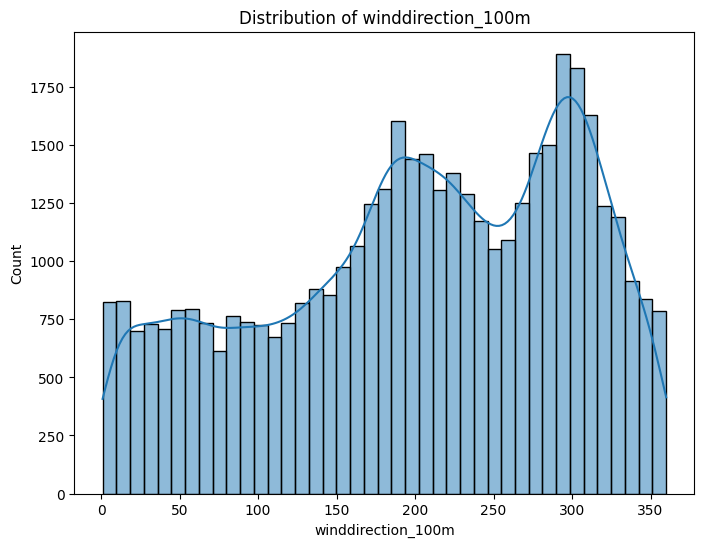

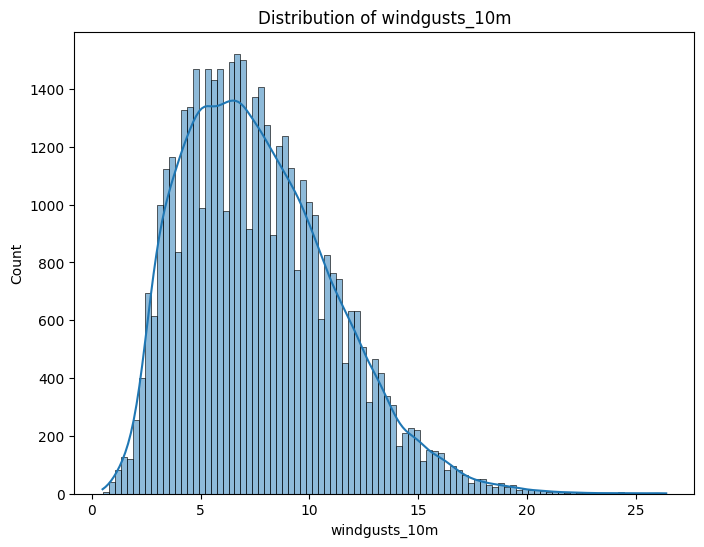

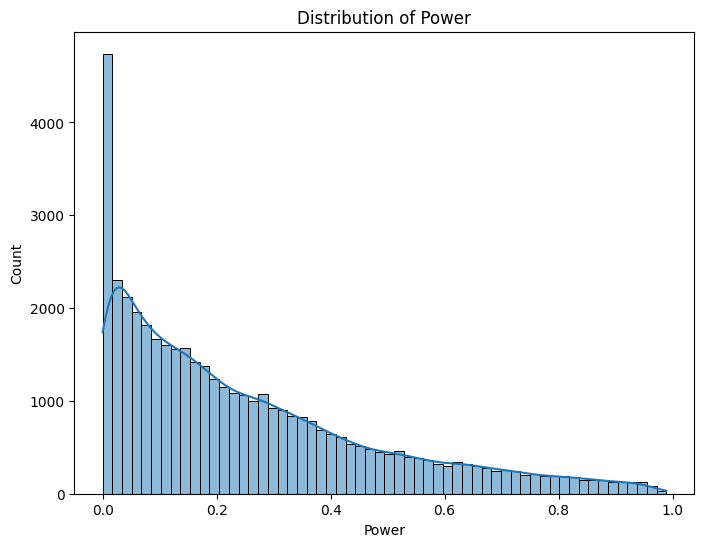

                      Time  temperature_2m  relativehumidity_2m   dewpoint_2m  \
count                43800    43800.000000         43800.000000  43800.000000   
mean   2019-07-03 11:30:00       46.809829            70.956621     37.054274   
min    2017-01-02 00:00:00      -28.800000             9.000000    -35.600000   
25%    2018-04-03 05:45:00       30.300000            59.000000     21.900000   
50%    2019-07-03 11:30:00       47.100000            73.000000     37.100000   
75%    2020-10-01 17:15:00       65.400000            85.000000     55.300000   
max    2021-12-31 23:00:00       93.800000           100.000000     77.900000   
std                    NaN       21.561586            16.969744     20.995804   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
count   43800.000000    43800.000000       43800.000000        43800.000000   
mean        4.012071        6.612864         199.400731          201.359954   
min         0.000000        0.000

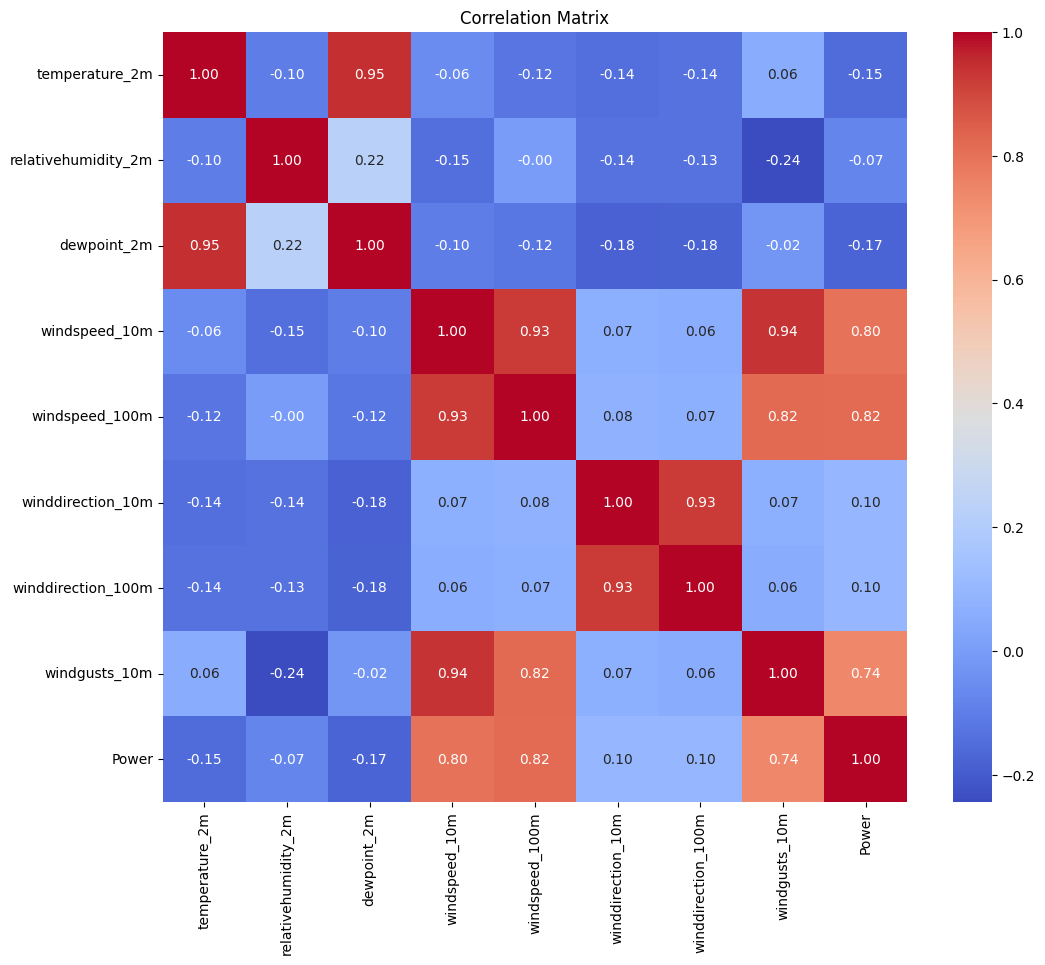

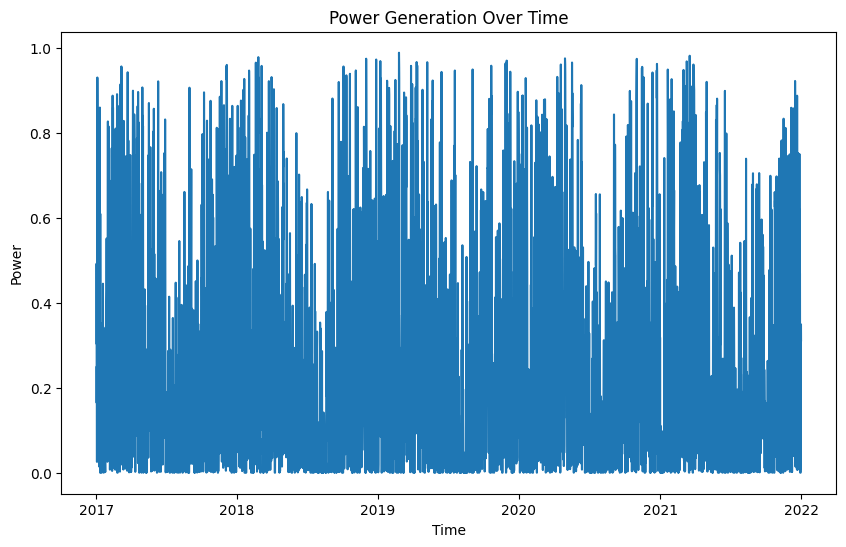

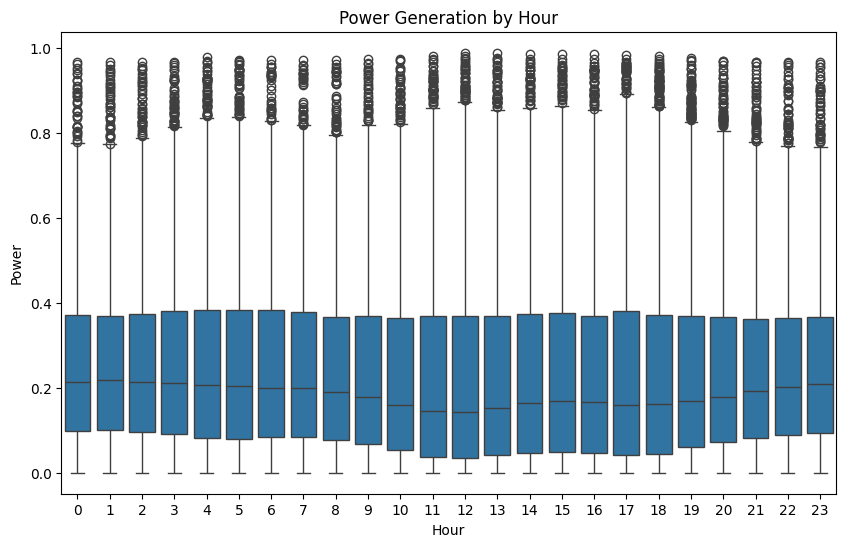

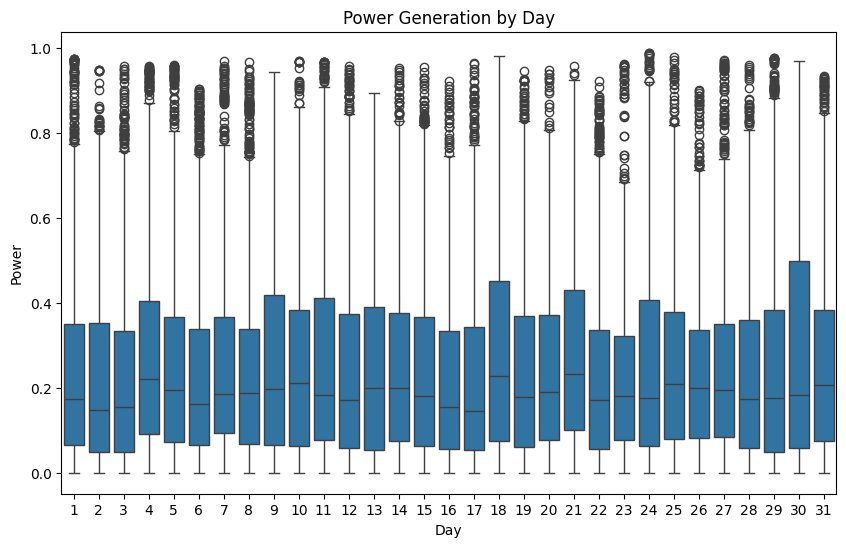

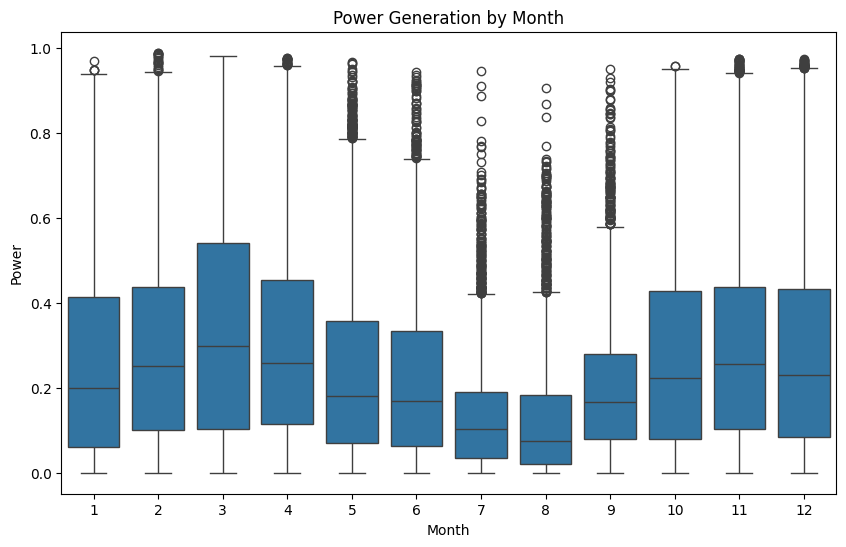

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Analyze distributions
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 2. Calculate descriptive statistics
print(df.describe())

# Compare mean and median for skewness
print("\nMean vs. Median:")
for col in numerical_cols:
    print(f"{col}: Mean = {df[col].mean():.2f}, Median = {df[col].median():.2f}")

# 3. Investigate correlations
# Convert 'Time' to datetime *before* calculating correlation
df['Time'] = pd.to_datetime(df['Time'])

#Exclude 'Time' column from correlation calculation
correlation_matrix = df.drop(columns=['Time']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Explore 'Time' column
# Convert 'Time' to datetime
# df['Time'] = pd.to_datetime(df['Time']) # This line is redundant now

# Extract time features
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.day
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year

# Analyze relationship between time features and 'Power'
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Power'])
plt.title('Power Generation Over Time')
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

# Box plots of Power by time features
for feature in ['Hour', 'Day', 'Month']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Power', data=df)
    plt.title(f'Power Generation by {feature}')
    plt.show()

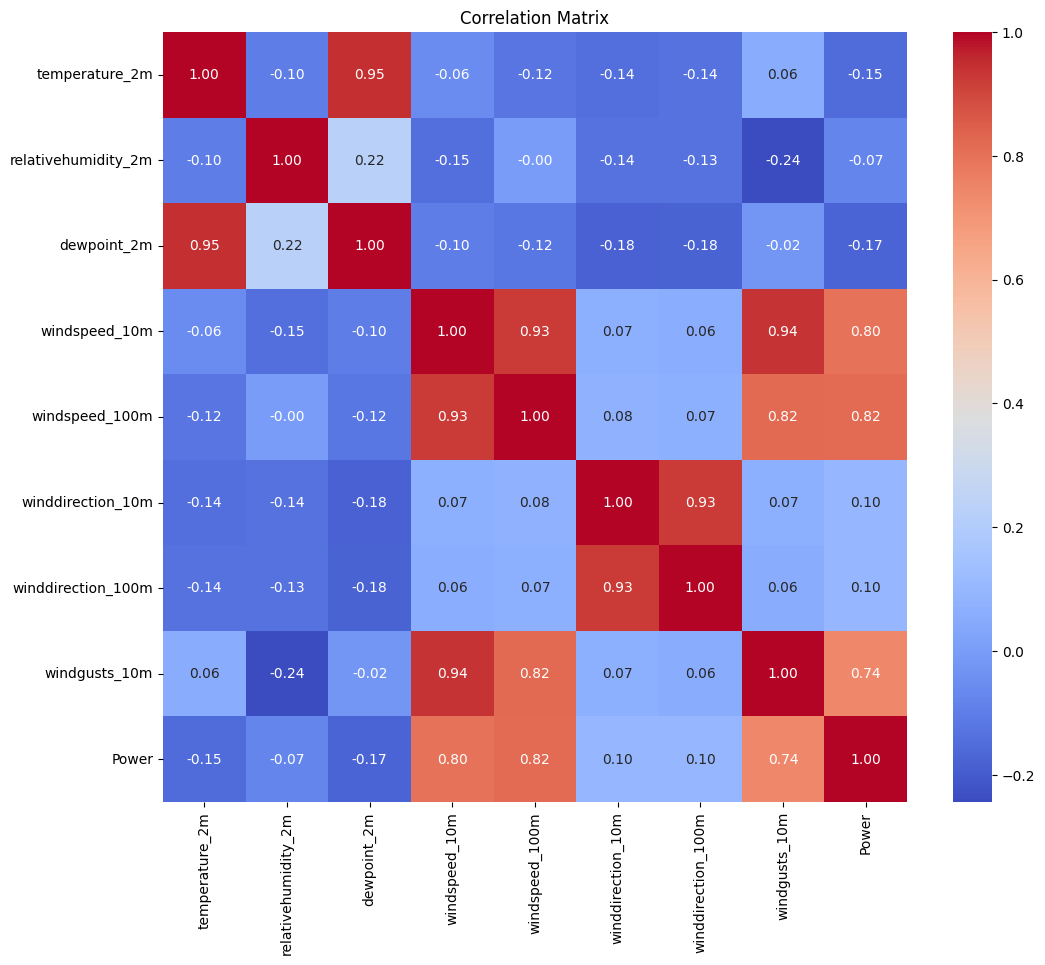

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Analyze distributions (already done in previous code block, no need to repeat)

# 2. Calculate descriptive statistics (already done in previous code block, no need to repeat)


# 3. Investigate correlations
# Convert 'Time' to datetime *before* calculating correlation
df['Time'] = pd.to_datetime(df['Time'])

# Remove the 'Time' column for correlation calculation
numerical_df = df.drop('Time', axis=1)

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 4. Explore 'Time' column (already done in previous code block, no need to repeat)
# ... (rest of the time series analysis code)


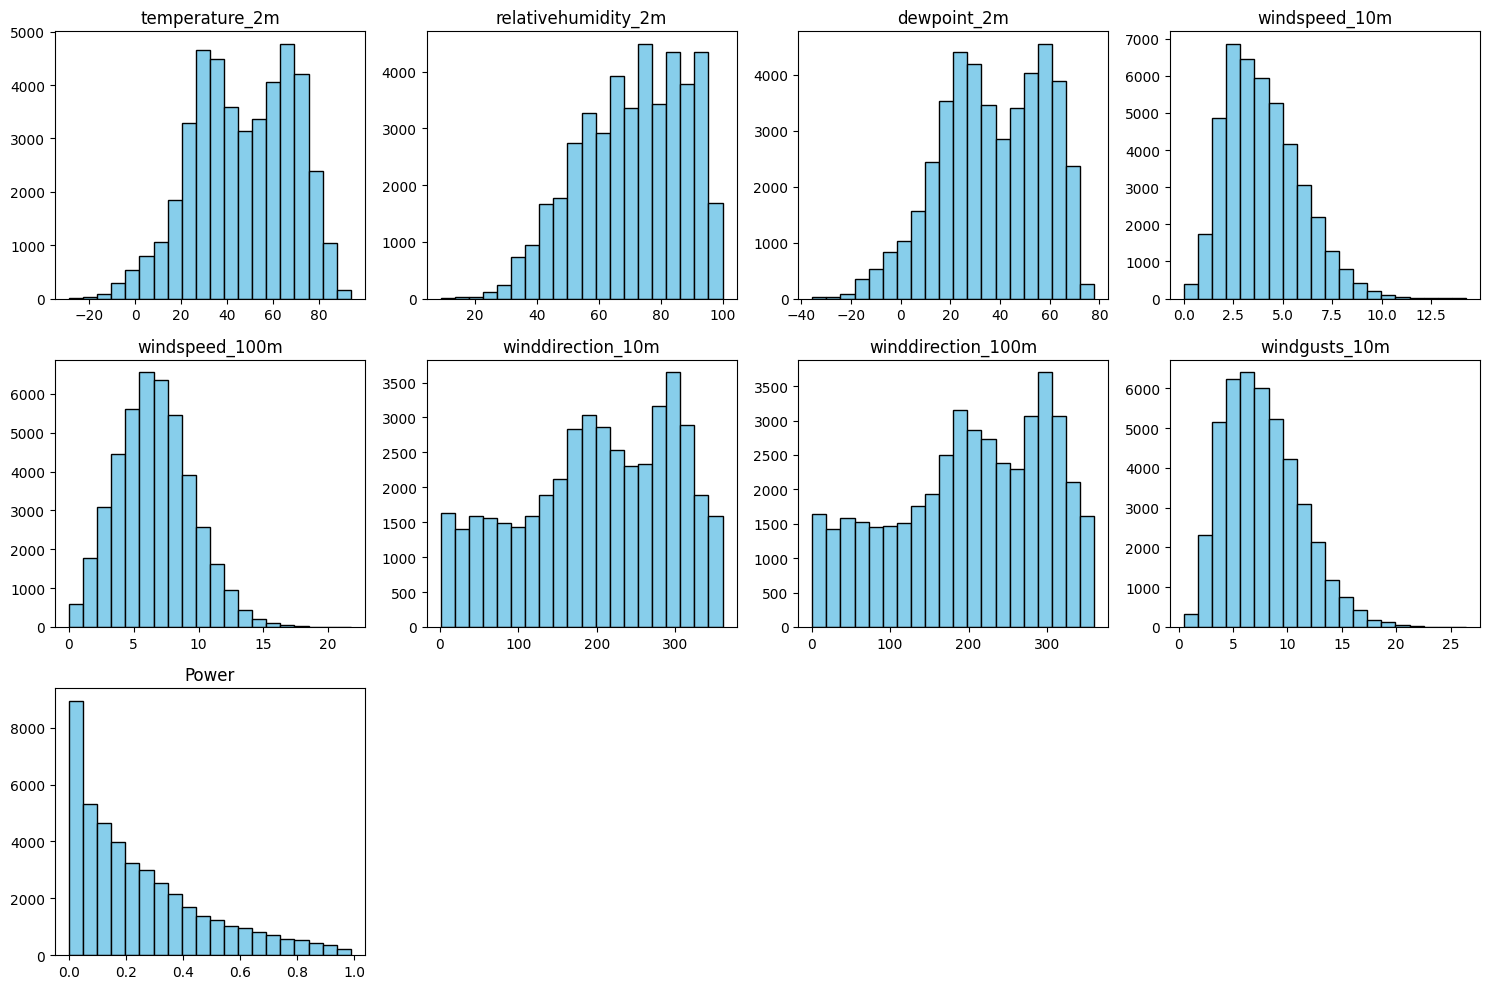

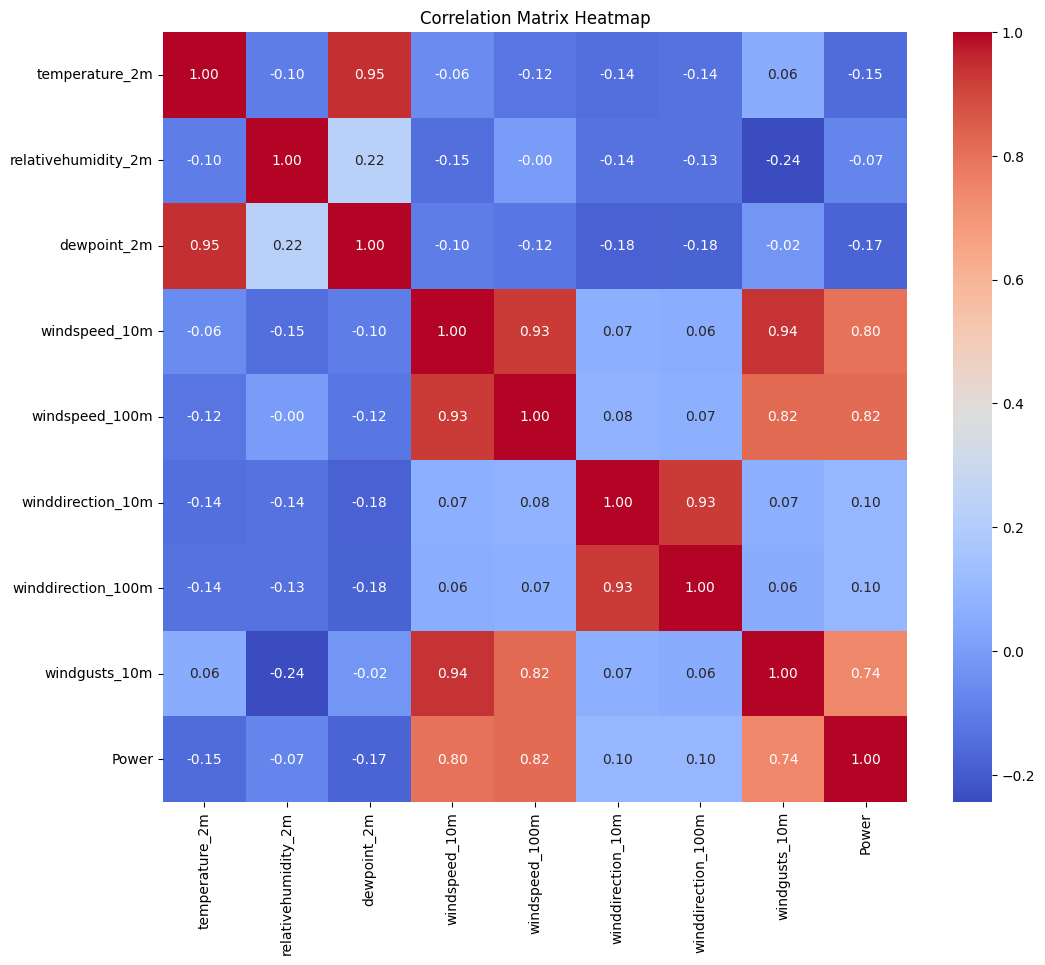

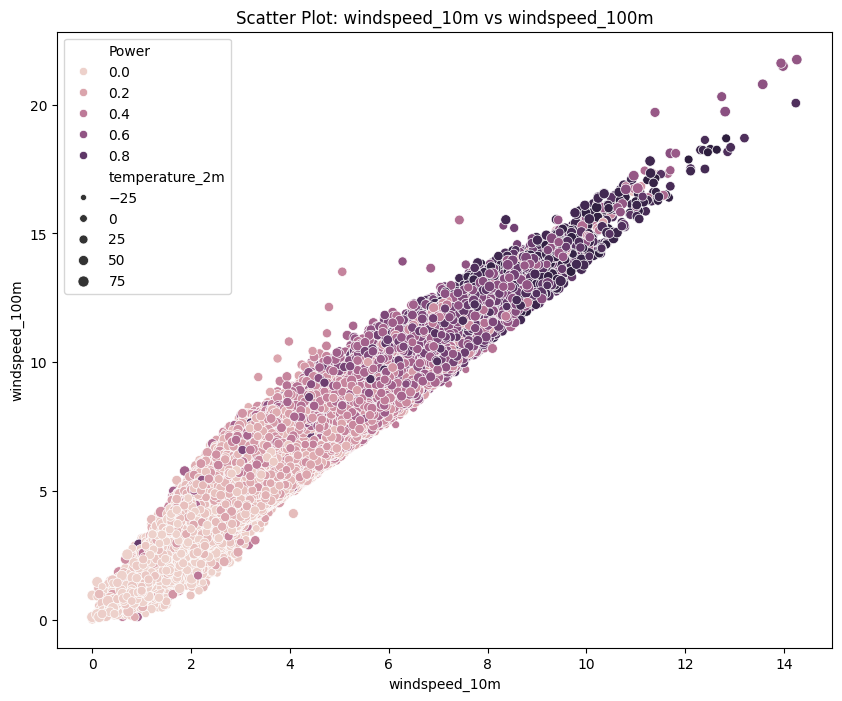

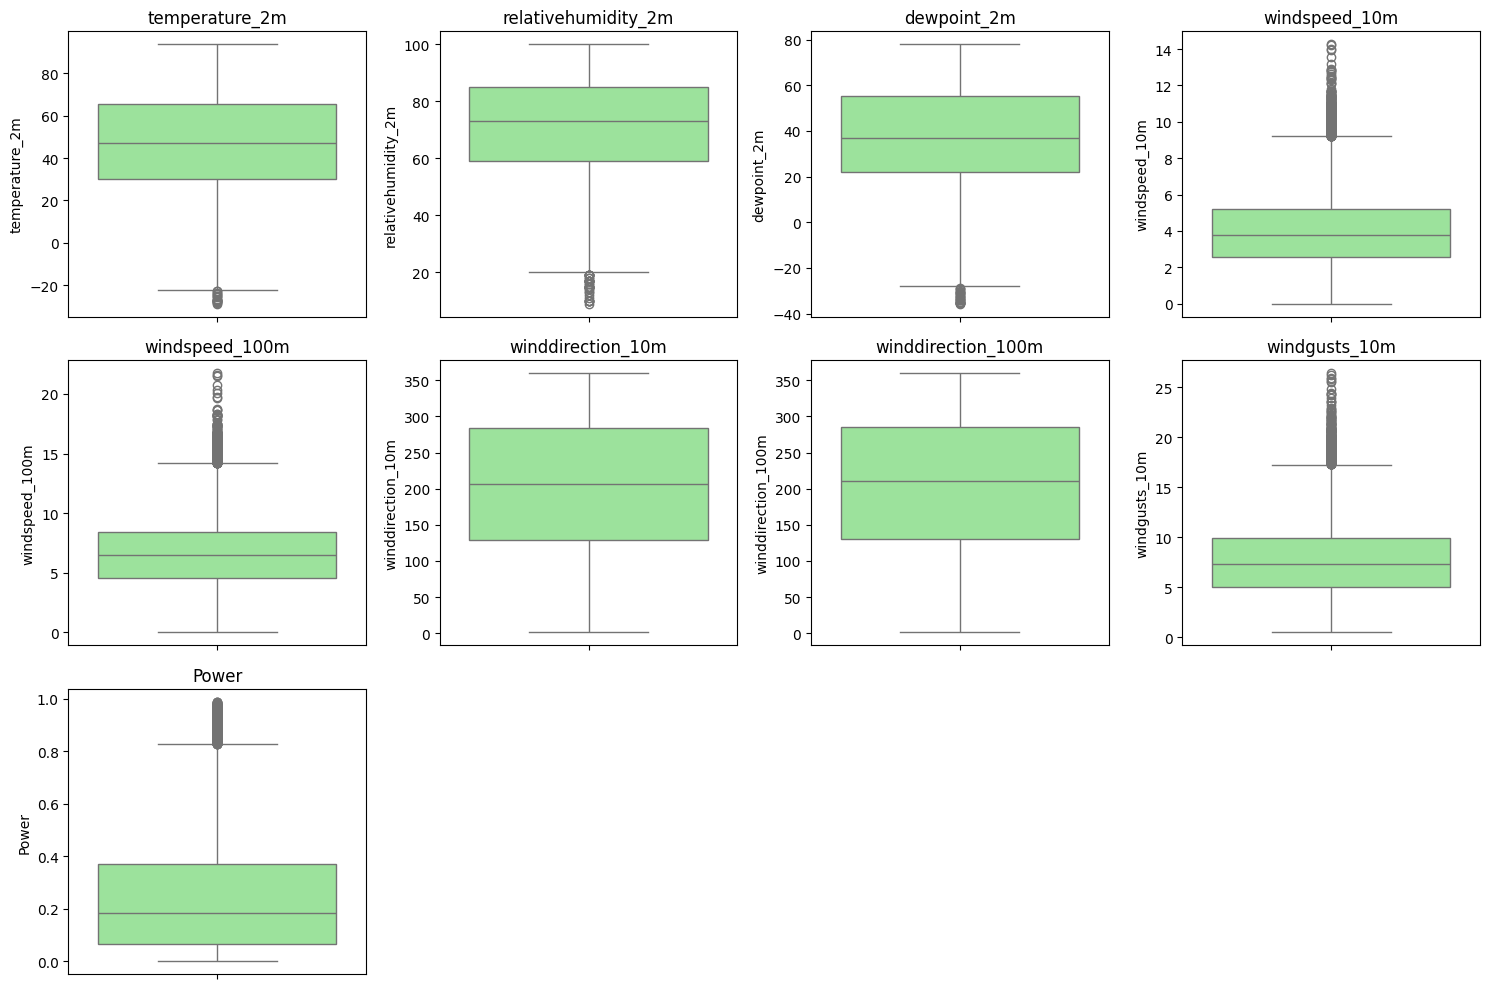

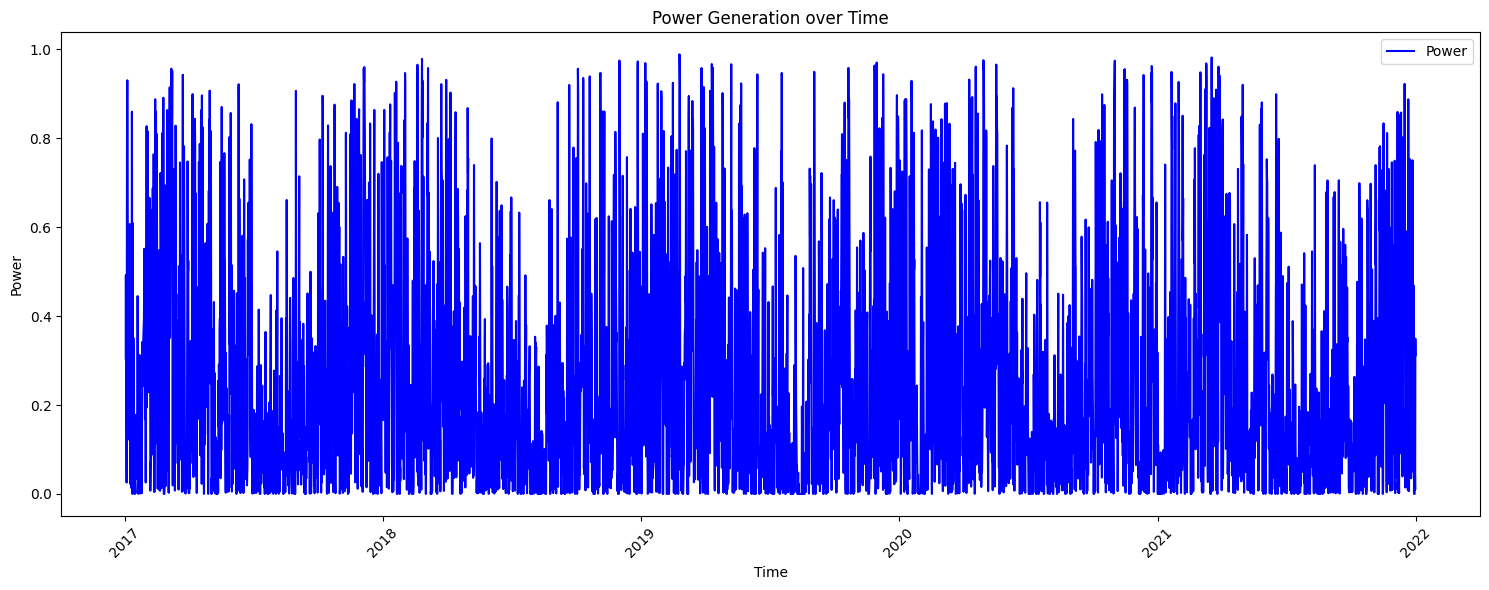

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap
numerical_df = df.drop('Time', axis=1)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter Plots (for highly correlated features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='windspeed_10m', y='windspeed_100m', data=df, hue='Power', size='temperature_2m')
plt.title('Scatter Plot: windspeed_10m vs windspeed_100m')
plt.show()


# Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=df[col], color='lightgreen')
  plt.title(col)
plt.tight_layout()
plt.show()

# Line Plots (Time Series)
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Power'], label='Power', color='blue')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Generation over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()